In [ ]:
from scipy.stats import expon, lognorm, norm, chi2
from scipy.stats import kstest
from scipy.stats import trim_mean, mode
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Kolmogorov-Smirnov Test: 

this can be used to test one of these 2 scenarios:
- does your data fit one of the standard distributions e.g. Gaussian distribution, exponential etc (useful if you need to see if your data fits the assumptions the modelling algorithm makes on data distribution)
- is your target data set distributed the same as your source dastaset (e.g. checking if your test set is similar enough to your training set)

We can make use of the kstest function from scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

Example 1:
source data has an exponential distribution, we compare against the normal and exponential distributions
- we set the null hypothesis to be that the source data agree with the target distribution
- confidence interval of 5%

In [ ]:
 # example 1:
dataset1 = expon.rvs(size=20000, random_state=123)

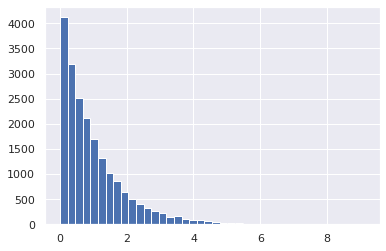

In [ ]:
plt.hist(dataset1, bins=40);

In [ ]:
test_vs_normal = kstest(dataset1, norm.cdf)
test_vs_expon = kstest(dataset1, expon.cdf)

print(f"p value: testing against normal distribution:{test_vs_normal.pvalue}")
print(f"p value: testing against exponential distribution:{test_vs_expon.pvalue}")


p value: testing against normal distribution:0.0
p value: testing against exponential distribution:0.6242398846333486


We can see that as expected, the first test against a normal distribution is rejected so and the second one matches with the null hypothesis

Example2: testing 2 datasets against each other:

In [ ]:
dataset2 = norm.rvs(size=20000, loc=1, scale=10, random_state=123)
dataset3 = norm.rvs(size=20000, loc=100, scale=10, random_state=123)
twosample1 = kstest(dataset1, dataset2)
# here, we have to be more careful, since dataset2 is shifted left to dataset3, we have to specify this in the 'alternative' argument
twosample2 = kstest(dataset2, dataset3, alternative='less')
twosample3 = kstest(dataset2, dataset3)

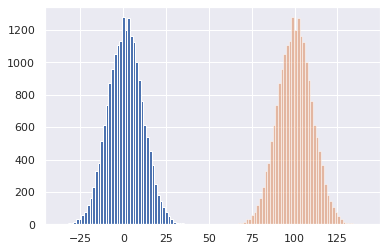

In [ ]:
plt.hist(dataset2, bins=50, label='dataset2');
plt.hist(dataset3, bins=50, alpha=0.5, label='dataset3');

In [ ]:
print(f"p value, comparing sample data from expon distribution and norm distribution : {twosample1.pvalue}")
print(f"p value, comparing sample data from 2 different normal distributions, using `alternative=less` argument : {twosample2.pvalue}")
print(f"p value, comparing sample data from 2 different normal distributions (no alternative argument specified) : {twosample3.pvalue}")


p value, comparing sample data from expon distribution and norm distribution : 0.0
p value, comparing sample data from 2 different normal distributions, using `alternative=less` argument : 1.0
p value, comparing sample data from 2 different normal distributions (no alternative argument specified) : 0.0


We can see that both the kstest with the two datasets that have different distributions as well as the test where distributions are the same but with different means give the result that they don't match (As we would expect, but also keep in mind whether you would need the alternative='less'/'greater' option)